In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch import optim
from model import YOLOv1
from dataset import VOCDataset, Compose
from utils import get_bboxes, load_checkpoint, plot_image

In [9]:

LOAD_MODEL_FILE = "/home/kpatel2s/kpatel2s/best_model.pth"
device = "cuda" if torch.cuda.is_available() else "cpu"

IMG_DIR = "/srv/disk1/datasets/kpatel2s_datasets/pascal_voc_dataset/images"
LABEL_DIR = "/srv/disk1/datasets/kpatel2s_datasets/pascal_voc_dataset/labels"

In [10]:
transform = Compose([transforms.Resize((448, 448)), transforms.ToTensor()])

model = YOLOv1(split_size=7, num_boxes=2, num_classes=20)
model.to(device)

opimizer = optim.Adam(
    model.parameters(), lr=2e-5, weight_decay=0
)

load_checkpoint(checkpoint=torch.load(LOAD_MODEL_FILE), model=model, optimizer=opimizer)

=> Loading checkpoint


In [11]:
test_dataset = VOCDataset(
    csv_file="/srv/disk1/datasets/kpatel2s_datasets/pascal_voc_dataset/8examples.csv",
    transform=transform,
    img_dir=IMG_DIR,
    label_dir=LABEL_DIR
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=1,
    shuffle=False,
)

In [12]:
# Visualize the dataset, first 3 images

img, bboxes = next(iter(test_loader))
img.shape, bboxes.shape
    

(torch.Size([1, 3, 448, 448]), torch.Size([1, 7, 7, 30]))

# Raw data

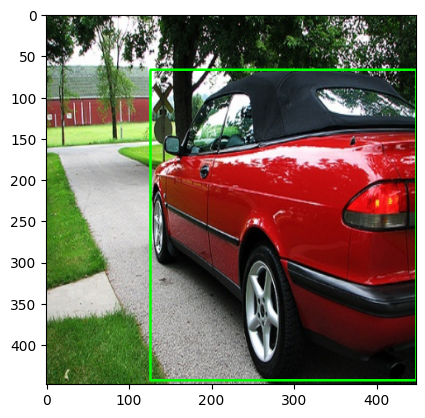

In [4]:
from matplotlib import pyplot as plt
import cv2

img_name = '/home/kpatel2s/work/kpatel2s_datasets/pascal_voc_dataset/images/000007.jpg'
label_name = '/home/kpatel2s/work/kpatel2s_datasets/pascal_voc_dataset/labels/000007.txt'

img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (448, 448))
breakpoint()
# Draw the bounding boxes on the image
with open(label_name) as f:
    labels = f.readlines()
    labels = [l.strip() for l in labels]
    labels = [l.split() for l in labels]

# draw rectangles on the image
for label in labels:
    x_center, y_center, width, height = float(label[1])*img.shape[1], float(label[2])*img.shape[0], float(label[3])*img.shape[1], float(label[4])*img.shape[0]
    x1, y1, x2, y2 = int(x_center - width / 2), int(y_center - height / 2), int(x_center + width / 2), int(y_center + height / 2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)

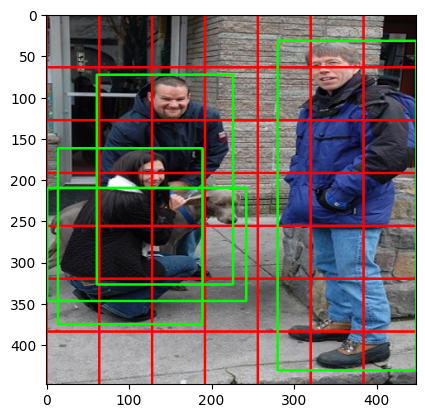

In [6]:
from matplotlib import pyplot as plt
import cv2

img_name = '/home/kpatel2s/work/kpatel2s_datasets/pascal_voc_dataset/images/000021.jpg'
label_name = '/home/kpatel2s/work/kpatel2s_datasets/pascal_voc_dataset/labels/000021.txt'

img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (448, 448))

# draw grid on the image of 7x7
for i in range(0, img.shape[0], 64):
    cv2.line(img, (i, 0), (i, img.shape[0]), (255, 0, 0), 2)
    cv2.line(img, (0, i), (img.shape[0], i), (255, 0, 0), 2)

breakpoint()
# Draw the bounding boxes on the image
with open(label_name) as f:
    labels = f.readlines()
    labels = [l.strip() for l in labels]
    labels = [l.split() for l in labels]

# draw rectangles on the image
for label in labels:
    x_center, y_center, width, height = float(label[1])*img.shape[1], float(label[2])*img.shape[0], float(label[3])*img.shape[1], float(label[4])*img.shape[0]
    x1, y1, x2, y2 = int(x_center - width / 2), int(y_center - height / 2), int(x_center + width / 2), int(y_center + height / 2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)